# **Project :** Telcom Churn Prediction

# **Problem Statement :** 

Here’s a dataset of telecom customers.

#### **Which customers are likely to churn? What are the attributes that make you think so?**

The features:

* customerID - customer id
* gender - client gender (male / female)
* SeniorCitizen - is the client retired (1, 0)
* Partner - is the client married (Yes, No)
* tenure - how many months a person has been a client of the company
* PhoneService - is the telephone service connected (Yes, No)
* MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
* InternetService - client’s Internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - is the online security service connected (Yes, No, No internet service)
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)
* DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
* TechSupport - is the technical support service connected (Yes, No, No internet service)
* StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
* Contract - type of customer contract (Month-to-month, One year, Two year)
* PaperlessBilling - whether the client uses paperless billing (Yes, No)
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - current monthly payment
* TotalCharges - the total amount that the client paid for the services for the entire time
* Churn - whether there was a churn (Yes or No)

## **1. Import Libraries**

In [1]:
#===========================================================================
# For data manipulation, plotting, and miscellaneous
#===========================================================================
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns 
plt.style.use("fivethirtyeight")
import plotly.express as px 
import datetime 
import os 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning) 
import calendar
from datetime import datetime
import pickle 
#============================================================================
# From sklearn import required classes
#============================================================================
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder,LabelEncoder,OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
#from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Metrics 
from sklearn import metrics 
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, accuracy_score, f1_score, recall_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

# machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import tree
from sklearn.tree import export_graphviz 
from IPython.display import display, Image
from graphviz import Source
from xgboost import XGBClassifier

import copy

from imblearn.over_sampling import SMOTE

## **2. Load the Dataset and Perform Visualization**

### 2.1. Load the Dataset

In [2]:
df_raw = pd.read_csv('data/telecom_users.csv')

In [3]:
df_raw.head(3)

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes


In [4]:
# Check duplicates 
df_raw.duplicated(subset=['customerID']).sum()

0

In [5]:
# deep copy to a working dataframe
df = df_raw.copy()  

In [6]:
# customerID is not required for analysis, hence drop it
df.drop(labels=['Unnamed: 0', 'customerID'], axis=1, inplace=True)  

In [7]:
df.shape

(5986, 20)

In [8]:
df.columns = df.columns.str.lower()  # convert the column labels to lower case for consistency

In [9]:
df.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes


### 2.2. Basic Data Checks

In [10]:
# check datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5986 non-null   object 
 1   seniorcitizen     5986 non-null   int64  
 2   partner           5986 non-null   object 
 3   dependents        5986 non-null   object 
 4   tenure            5986 non-null   int64  
 5   phoneservice      5986 non-null   object 
 6   multiplelines     5986 non-null   object 
 7   internetservice   5986 non-null   object 
 8   onlinesecurity    5986 non-null   object 
 9   onlinebackup      5986 non-null   object 
 10  deviceprotection  5986 non-null   object 
 11  techsupport       5986 non-null   object 
 12  streamingtv       5986 non-null   object 
 13  streamingmovies   5986 non-null   object 
 14  contract          5986 non-null   object 
 15  paperlessbilling  5986 non-null   object 
 16  paymentmethod     5986 non-null   object 


In [11]:
# Convert 'TotalCharges' to numeric
df['totalcharges'] = pd.to_numeric(df['totalcharges'], errors='coerce')

In [12]:
df.dropna(inplace=True)

In [13]:
# check null values
df.isnull().sum()

gender              0
seniorcitizen       0
partner             0
dependents          0
tenure              0
phoneservice        0
multiplelines       0
internetservice     0
onlinesecurity      0
onlinebackup        0
deviceprotection    0
techsupport         0
streamingtv         0
streamingmovies     0
contract            0
paperlessbilling    0
paymentmethod       0
monthlycharges      0
totalcharges        0
churn               0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5976 entries, 0 to 5985
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            5976 non-null   object 
 1   seniorcitizen     5976 non-null   int64  
 2   partner           5976 non-null   object 
 3   dependents        5976 non-null   object 
 4   tenure            5976 non-null   int64  
 5   phoneservice      5976 non-null   object 
 6   multiplelines     5976 non-null   object 
 7   internetservice   5976 non-null   object 
 8   onlinesecurity    5976 non-null   object 
 9   onlinebackup      5976 non-null   object 
 10  deviceprotection  5976 non-null   object 
 11  techsupport       5976 non-null   object 
 12  streamingtv       5976 non-null   object 
 13  streamingmovies   5976 non-null   object 
 14  contract          5976 non-null   object 
 15  paperlessbilling  5976 non-null   object 
 16  paymentmethod     5976 non-null   object 


In [15]:
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [16]:
# Basic statistics 
df.describe()

,seniorcitizen,tenure,monthlycharges,totalcharges
count,5976.000000,5976.000000,5976.000000,5976.000000
mean,0.161647,32.523092,64.846687,2298.060617
std,0.368157,24.500858,30.107576,2274.127165
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.750000,404.312500
50%,0.000000,29.000000,70.425000,1412.150000
75%,0.000000,56.000000,89.900000,3846.962500
max,1.000000,72.000000,118.750000,8684.800000


In [17]:
# Print unique values in each column   
for columns in df.columns:
    print(columns)
    print(df[columns].unique())
    print()

gender
['Male' 'Female']

seniorcitizen
[0 1]

partner
['Yes' 'No']

dependents
['Yes' 'No']

tenure
[72 44 38  4  2 70 33  1 39 55 52 30 60 50 32 51 69 42 14 62  5 63 67 40
 65 16 46 11 49 68 10 53 54 15  3 71  8 64 57 20 26 31  7 35  6 13 23  9
 45 17 34 58 12 25 28 29 43 19 41 37 27 22 24 18 56 66 59 48 47 61 21 36]

phoneservice
['Yes' 'No']

multiplelines
['Yes' 'No' 'No phone service']

internetservice
['No' 'Fiber optic' 'DSL']

onlinesecurity
['No internet service' 'No' 'Yes']

onlinebackup
['No internet service' 'Yes' 'No']

deviceprotection
['No internet service' 'Yes' 'No']

techsupport
['No internet service' 'No' 'Yes']

streamingtv
['No internet service' 'Yes' 'No']

streamingmovies
['No internet service' 'No' 'Yes']

contract
['Two year' 'Month-to-month' 'One year']

paperlessbilling
['No' 'Yes']

paymentmethod
['Credit card (automatic)' 'Bank transfer (automatic)' 'Electronic check'
 'Mailed check']

monthlycharges
[24.1  88.15 74.95 ... 59.25 35.35 21.15]

totalcharges


## **3. Exploratory Data Aanalysis (EDA)**

### 3.1. Label Encode the Target

In [18]:
# 1. Encoding Target Label
le = LabelEncoder()
df['churn'] = le.fit_transform(df['churn'])
le.classes_

array(['No', 'Yes'], dtype=object)

**No Churn : 0**

**Churn : 1**

In [19]:
df.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,0
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,0
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,1


### 3.2. Univariate Analysis

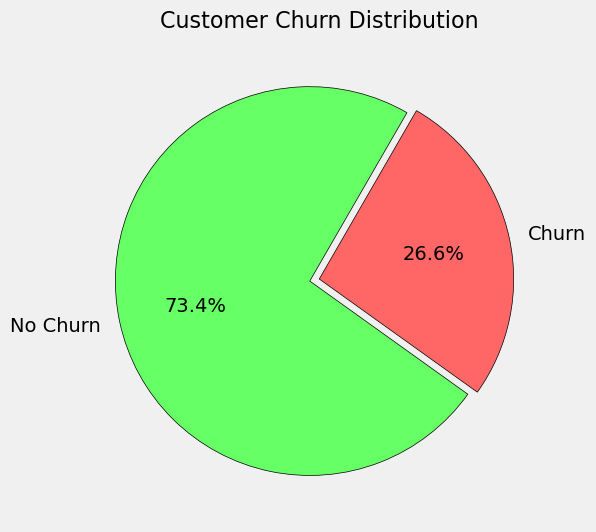

In [20]:
plt.figure(figsize=(8, 6))
colors = ['#66ff66', '#ff6666']  # Custom colors for the pie chart
explode = (0.05, 0)  # Exploding the first slice slightly for emphasis

plt.pie(df['churn'].value_counts(),
        labels=['No Churn', 'Churn'],   
        autopct='%.1f%%', 
        startangle=60,  # Start angle for better layout
        explode=explode,
        colors=colors,
        wedgeprops={'edgecolor': 'black'},  # Add border
        textprops={'fontsize': 14})  # Increase font size for readability

plt.title('Customer Churn Distribution', fontsize=16)
plt.show()


#### 3.2.1. Histograms

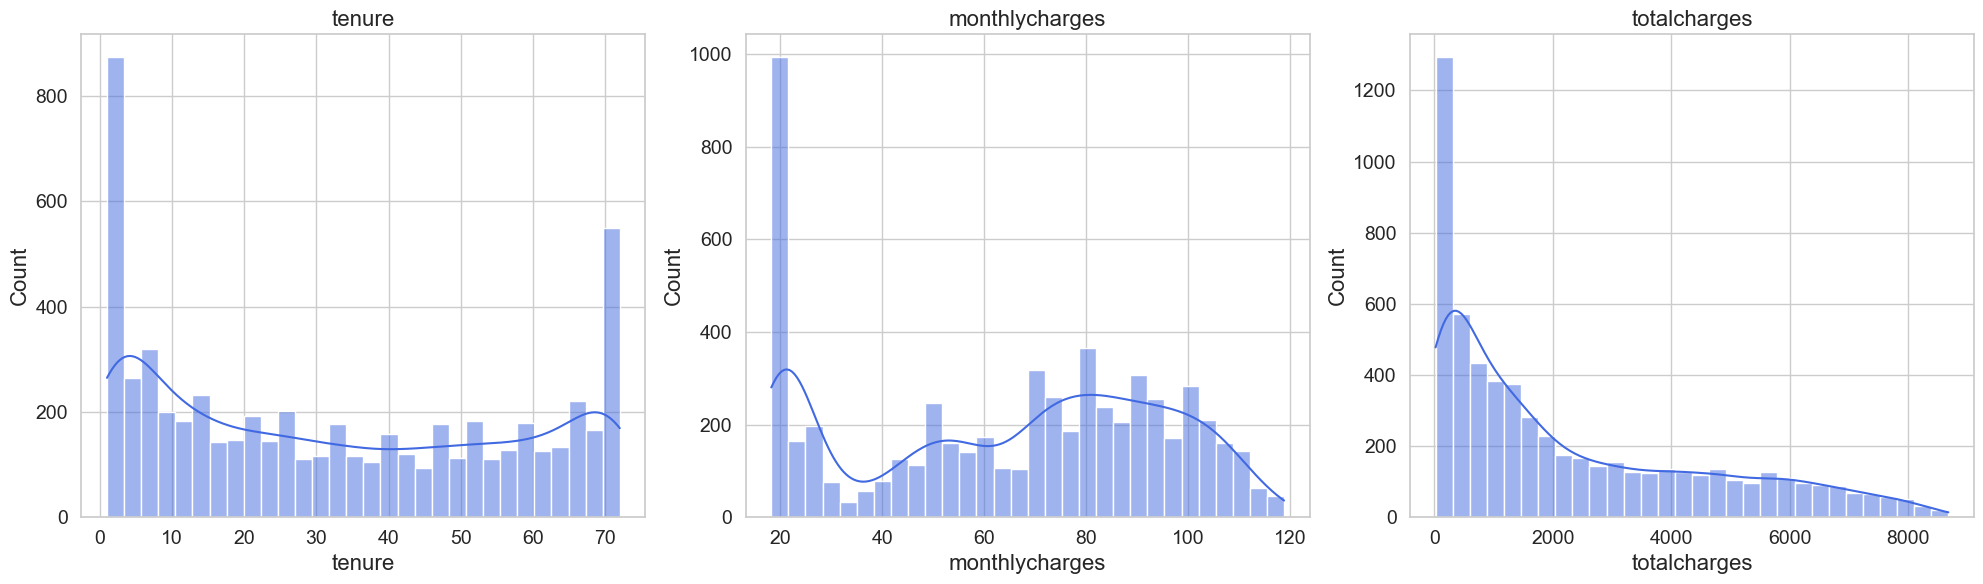

In [21]:
# plot histograms of tenure, monthlycharges, totalcharges 	
feature_columns = ['tenure','monthlycharges', 'totalcharges']  

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))  
axes = axes.flatten() # Flatten axes for easy iteration

for i, feature in enumerate(feature_columns):
    sns.histplot(df[feature], kde=True, color='royalblue', bins=30, ax=axes[i])
    axes[i].set_title(f'{feature}', fontsize=16)
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=16)
    axes[i].set_ylabel(axes[i].get_ylabel(), fontsize=16)

    # Set font size for x-axis and y-axis tick labels
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)

plt.tight_layout();

#### 3.2.2. Box plots

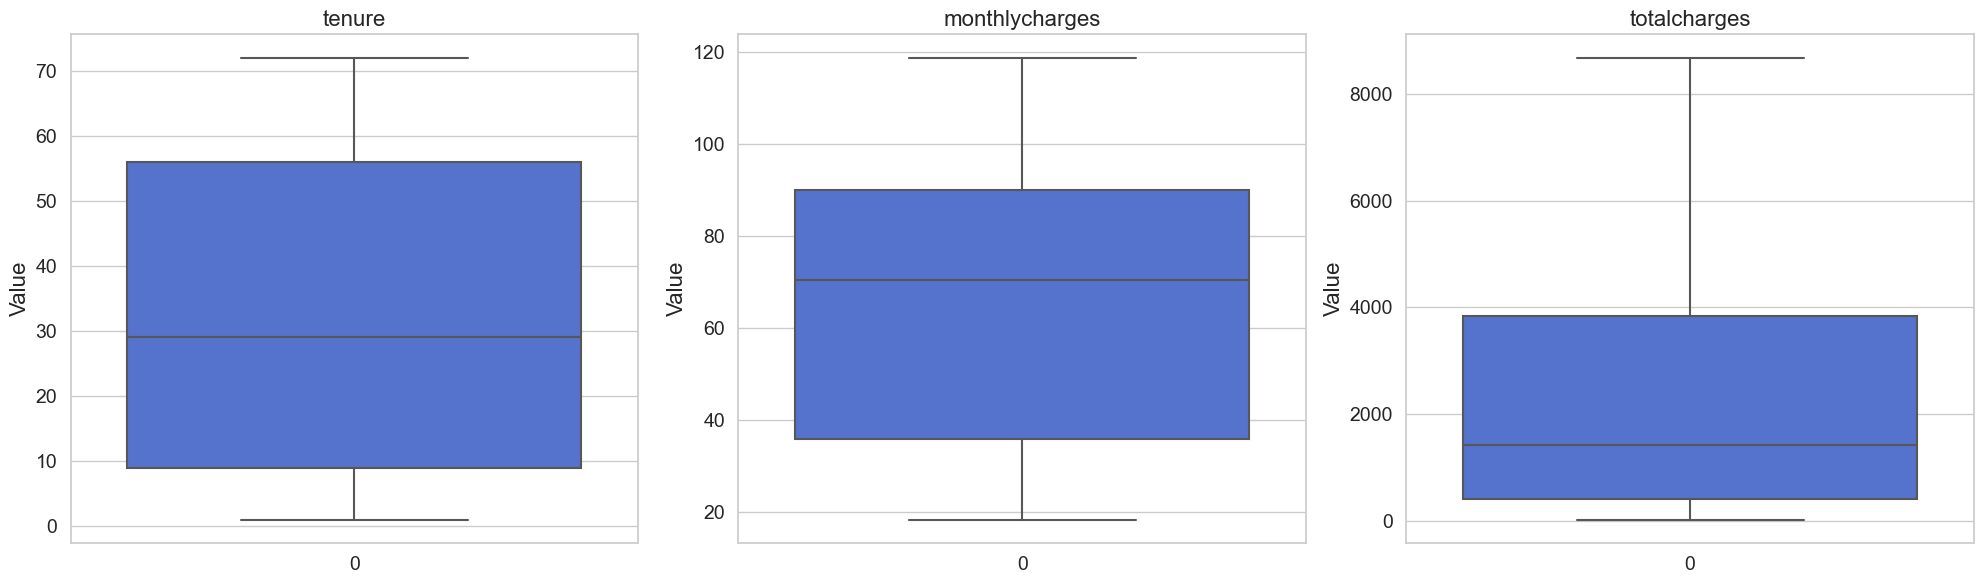

In [22]:
# plot box plots of tenure, monthlycharges, totalcharges 	
feature_columns = ['tenure','monthlycharges', 'totalcharges']  

sns.set(style="whitegrid")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20,6))  
axes = axes.flatten() # Flatten axes for easy iteration

for i, feature in enumerate(feature_columns):
    sns.boxplot(data=df[feature], ax=axes[i],color='royalblue')
    axes[i].set_title(f'{feature}', fontsize=16)
    axes[i].set_xlabel(axes[i].get_xlabel(), fontsize=16)
    axes[i].set_ylabel('Value', fontsize=16)

    # Set font size for x-axis and y-axis tick labels
    axes[i].tick_params(axis='x', labelsize=14)
    axes[i].tick_params(axis='y', labelsize=14)

plt.tight_layout();

### 3.3. Bivariate Analysis

#### 3.3.1. Correlation matrix

In [23]:
corr_df = df.corr(numeric_only=True).abs()
corr_df

,seniorcitizen,tenure,monthlycharges,totalcharges,churn
seniorcitizen,1.000000,0.004503,0.219009,0.093160,0.149726
tenure,0.004503,1.000000,0.255676,0.827439,0.350420
monthlycharges,0.219009,0.255676,1.000000,0.656534,0.186122
totalcharges,0.093160,0.827439,0.656534,1.000000,0.197632
churn,0.149726,0.350420,0.186122,0.197632,1.000000


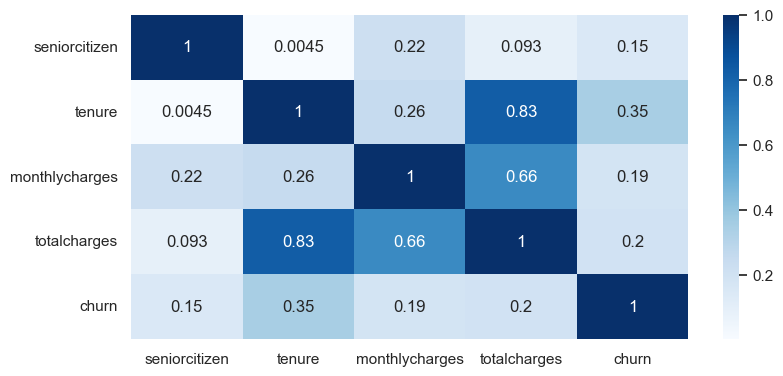

In [24]:
plt.figure(figsize=(8,4))
sns.heatmap(corr_df, annot=True, cmap='Blues')
plt.show()

In [25]:
#try to drop one of the column "totalcharges" or tenure, in the next iteration

## **4. Data Preparation**

### 4.0. Data transformation

**Replace 'Male' with 1 and 'Female' with 0, and 'Yes' with 1 and 'No' with 0**

**"No internet service", "No phone service" with "No"**

In [26]:
df.replace(["No internet service", "No phone service"], "No", inplace=True)
df['gender'] = df['gender'].replace({'Male': 1, 'Female': 0})
binary_columns = ['partner', 'dependents','phoneservice','multiplelines','onlinesecurity','onlinebackup',
                      'deviceprotection', 'techsupport', 'streamingtv','streamingmovies','paperlessbilling']  
for col in binary_columns:
    df[col] = df[col].replace({'Yes': 1, 'No': 0})

In [27]:
df.head(2)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,1,0,1,1,72,1,1,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65,0
1,0,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.20,0


In [28]:
df.shape

(5976, 20)

In [29]:
df['seniorcitizen'].unique()

array([0, 1], dtype=int64)

### 4.1 Split the data into features (X) and target (y)

In [30]:
# Features and Target
X = df.drop(columns=['churn'])
y = df['churn']
X.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
0,1,0,1,1,72,1,1,No,0,0,0,0,0,0,Two year,0,Credit card (automatic),24.10,1734.65
1,0,0,0,0,44,1,0,Fiber optic,0,1,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.20
2,0,1,1,0,38,1,1,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85


In [31]:
y.head()

0    0
1    0
2    1
3    0
4    0
Name: churn, dtype: int32

In [32]:
# store categorical and numerical column labels to a list
categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

In [33]:
numerical_cols

['gender',
 'seniorcitizen',
 'partner',
 'dependents',
 'tenure',
 'phoneservice',
 'multiplelines',
 'onlinesecurity',
 'onlinebackup',
 'deviceprotection',
 'techsupport',
 'streamingtv',
 'streamingmovies',
 'paperlessbilling',
 'monthlycharges',
 'totalcharges']

In [34]:
categorical_cols

['internetservice', 'contract', 'paymentmethod']

### 4.2 Train-test split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3, shuffle=True, stratify=y)

In [36]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5378, 19), (598, 19), (5378,), (598,))

In [37]:
X_train.head()

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
224,0,0,1,1,7,0,0,DSL,1,0,0,1,0,0,Month-to-month,0,Mailed check,34.65,246.60
3899,1,0,0,0,2,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,20.75,44.20
5964,1,0,1,1,32,0,0,DSL,0,0,1,1,0,0,One year,1,Mailed check,36.25,1151.05
2920,0,1,0,0,23,1,1,Fiber optic,0,0,1,0,0,0,Month-to-month,1,Mailed check,79.35,1835.30
3902,0,0,1,1,62,1,1,Fiber optic,1,0,0,0,1,1,Two year,1,Bank transfer (automatic),101.15,6638.35


In [38]:
X_test.head(3)

,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,onlinebackup,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges
5268,1,0,0,0,1,1,0,No,0,0,0,0,0,0,Month-to-month,1,Bank transfer (automatic),20.2,20.20
947,0,1,0,0,20,1,1,Fiber optic,0,1,1,0,0,1,Month-to-month,1,Electronic check,94.1,1782.40
5749,1,0,1,1,19,1,0,No,0,0,0,0,0,0,Month-to-month,0,Mailed check,20.6,414.95


### 4.3. Data transformation pipeline

In [39]:
# Preprocessing pipeline
preprocessor = ColumnTransformer([   
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['internetservice','contract','paymentmethod'])  # Apply OneHotEncoder to other categorical cols
    ],
    remainder='passthrough'  # Keep other columns as-is
)

# check : apply the pipeline check the resulting dataframe
X_train_new = preprocessor.fit_transform(X_train)
X_train_new = pd.DataFrame(X_train_new)

In [40]:
X_train_new.head().T

,0,1,2,3,4
0,1.00,0.00,1.00,0.00,0.00
1,0.00,0.00,0.00,1.00,1.00
2,0.00,1.00,0.00,0.00,0.00
3,1.00,1.00,0.00,1.00,0.00
4,0.00,0.00,1.00,0.00,0.00
5,0.00,0.00,0.00,0.00,1.00
6,0.00,0.00,0.00,0.00,1.00
7,0.00,0.00,0.00,0.00,0.00
8,0.00,0.00,0.00,0.00,0.00
9,1.00,1.00,1.00,1.00,0.00


#### **4.3.1 Normalizing the Input data**

**Since Random Forest is a Tree-based model, hence normalization of variables is optional**

## **4. Random Forest Model**

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

RandomForestClassifier
class sklearn.ensemble.RandomForestClassifier(n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None, monotonic_cst=None)

### 4.1. Baseline Model

In [41]:
# check point
X_train_transformed = preprocessor.fit_transform(X_train)

smote = SMOTE(random_state=3)
X_res, y_res = smote.fit_resample(X_train_transformed, y_train)

print("Class distribution after SMOTE:")
print(pd.Series(y_res).value_counts())

Class distribution after SMOTE:
0    3950
1    3950
Name: churn, dtype: int64


In [42]:
rfc = RandomForestClassifier(n_estimators=1000, 
                             criterion='gini', 
                             max_depth=30, 
                             max_features=0.30, 
                             max_samples=0.75, 
                             oob_score=True,
                             class_weight='balanced',
                             random_state=3)

In [43]:
from imblearn.pipeline import Pipeline  # Import from imblearn for SMOTE support

pipeline_rfc = Pipeline([("col_transformer", preprocessor),
                         ("smote", SMOTE(random_state=3)),  # Step 2: SMOTE for handling class imbalance
                         ("model", rfc)])

In [44]:
pipeline_rfc.fit(X_train,y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['internetservice',
                                                   'contract',
                                                   'paymentmethod'])])),
                ('smote', SMOTE(random_state=3)),
                ('model',
                 RandomForestClassifier(class_weight='balanced', max_depth=30,
                                        max_features=0.3, max_samples=0.75,
                                        n_estimators=1000, oob_score=True,
                                        random_state=3))])

In [45]:
pipeline_rfc.named_steps

{'col_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehot',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['internetservice', 'contract',
                                   'paymentmethod'])]),
 'smote': SMOTE(random_state=3),
 'model': RandomForestClassifier(class_weight='balanced', max_depth=30, max_features=0.3,
                        max_samples=0.75, n_estimators=1000, oob_score=True,
                        random_state=3)}

In [46]:
y_pred = pipeline_rfc.predict(X_test)

In [47]:
accuracy_score(y_test,y_pred)

0.7892976588628763

In [48]:
rfc = pipeline_rfc.named_steps['model']

In [49]:
rfc.oob_score_   # accuracy of the model on Out of Bag(oob) data samples (whcih can be treated as validation set)

0.8584810126582278

### 4.2. Cross Validation

In [50]:
cross_val_score(pipeline_rfc, X_train, y_train, cv=3, scoring='recall_macro').mean()

0.7000198615771613

In [51]:
#metrics.get_scorer_names()

### 4.3. GridSearch

In [52]:
# parameters for gridsearchcv
params = {
    'model__max_features' : [0.2,0.3,0.4],       # percentage of features to consider at every split
    'model__max_samples' : [0.5,0.75],   # percentage of samples to draw from training data to train each base estimator
    'model__n_estimators':[100,500,1000],     # Number of trees in random forest
    'model__max_depth':[5,10,20,None]      # None : nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
}

In [53]:
grid = GridSearchCV(pipeline_rfc, params, cv=3, scoring='recall_macro')
#grid.fit(X_train, y_train)

In [54]:
#grid.best_score_

In [55]:
#grid.best_params_

### 4.4. Final model on the tuned parameters

In [56]:
# Preprocessing pipeline
preprocessor_treebased = ColumnTransformer([   
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['internetservice','contract','paymentmethod'])  # Apply OneHotEncoder to other categorical cols
    ],
    remainder='passthrough'  # Keep other columns as-is
)

In [57]:
rfc = RandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=5, 
                             max_features=0.30, 
                             max_samples=0.75, 
                             oob_score=True,                            
                             random_state=3)

In [58]:
from imblearn.pipeline import Pipeline  # Import from imblearn for SMOTE support

pipeline_rfc = Pipeline([("col_transformer", preprocessor_treebased),
                         ("smote", SMOTE(random_state=3)),  # Step 2: SMOTE for handling class imbalance
                         ("model", rfc)])

pipeline_rfc.fit(X_train,y_train)
y_pred = pipeline_rfc.predict(X_test)

In [106]:
from imblearn.pipeline import Pipeline  # Import from imblearn for SMOTE support

# Using Random forest for feature selection
rfc_fs = RandomForestClassifier(n_estimators=1000, random_state=3)

rfc = RandomForestClassifier(n_estimators=1000, 
                             criterion='gini', 
                             max_depth=5, 
                             max_features=0.30, 
                             max_samples=0.75, 
                             oob_score=True,                            
                             random_state=3)

# SelectFromModel 
feature_selector_rfc = SelectFromModel(rfc_fs, threshold='1.25*mean')  # Keep features with importance above threshold

# Pipeline with feature selection step + final model to be trained, here I am using Random forest
pipe_rf = Pipeline([
    ("col_transformer", preprocessor_treebased),
    ("smote", SMOTE(random_state=3)),  # Step 2: SMOTE for handling class imbalance
    ('feature_selection', feature_selector_rfc),
    ('model', rfc)
])

pipe_rf.fit(X_train, y_train)
y_pred = pipe_rf.predict(X_test)

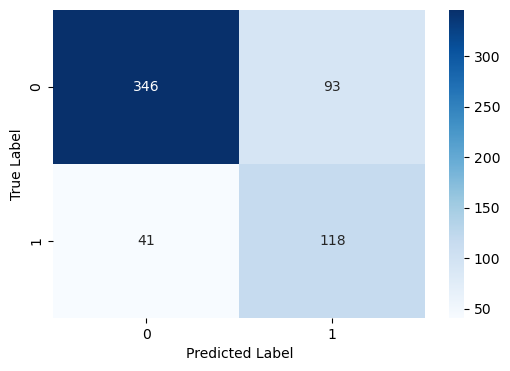

In [107]:
confusion_mat = confusion_matrix(y_test, y_pred)
n_labels=df['churn'].nunique()
pd.DataFrame(confusion_mat,columns=list(range(0,n_labels)))
plt.figure(figsize=(6,4))
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Label')
plt.xlabel('Predicted Label');

In [59]:
rfc = pipeline_rfc.named_steps['model']
rfc.oob_score_   # accuracy of the model on Out of Bag(oob) data samples (whcih can be treated as validation set)

0.8334177215189873

### 4.5. Confusion Matrix & Classification Report

In [60]:
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    f1_score_weighted = f1_score(y_test, y_pred, average='weighted')

    print("-"*70)
    print(f'{model_name} F1_score(weighted): {f1_score_weighted:.2f}')
    print("")
    print(f'{model_name} Classification Report:\n{class_report}')
    print("-"*70)
 
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Churn', 'Churn'])
    plt.style.use("default")
    disp.plot(cmap='Blues')
    #plt.figure(figsize=(10,4))
    plt.title(f'{model_name} Confusion Matrix')
    plt.grid(visible=False)
    plt.show();

----------------------------------------------------------------------

Random Forest Results:
----------------------------------------------------------------------
Random Forest F1_score(weighted): 0.79

Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       439
           1       0.58      0.74      0.65       159

    accuracy                           0.79       598
   macro avg       0.74      0.77      0.75       598
weighted avg       0.81      0.79      0.79       598

----------------------------------------------------------------------


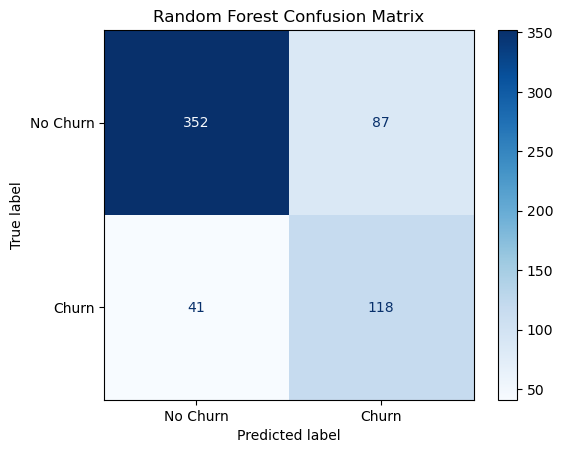

In [61]:
print("-"*70)
print("\nRandom Forest Results:")
evaluate_model(pipeline_rfc, X_test, y_test, "Random Forest")

ROC AUC Score: 0.8452027907909629


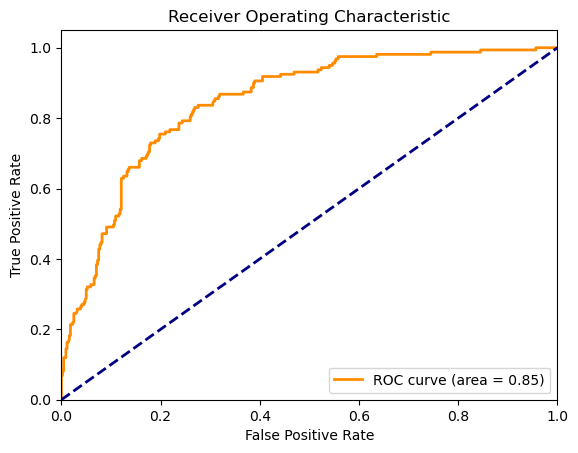

In [62]:
y_proba = pipeline_rfc.predict_proba(X_test)[:, 1]

# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 4.7. Feature Importance

In [63]:
pipeline_rfc.named_steps['model']

RandomForestClassifier(max_depth=5, max_features=0.3, max_samples=0.75,
                       oob_score=True, random_state=3)

In [64]:
X_train.columns   # but during one-hot-encoding the columns are swapped, check in previous steps

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity',
       'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv',
       'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod',
       'monthlycharges', 'totalcharges'],
      dtype='object')

In [65]:
pipeline_rfc.named_steps

{'col_transformer': ColumnTransformer(remainder='passthrough',
                   transformers=[('onehot',
                                  OneHotEncoder(handle_unknown='ignore',
                                                sparse_output=False),
                                  ['internetservice', 'contract',
                                   'paymentmethod'])]),
 'smote': SMOTE(random_state=3),
 'model': RandomForestClassifier(max_depth=5, max_features=0.3, max_samples=0.75,
                        oob_score=True, random_state=3)}

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder.get_feature_names_out

In [66]:
# Get the transformed feature names after applying preprocessing step in the pipeline
#ohe = pipeline_rfc.named_steps['col_transformer'].named_transformers_['onehot']
ohe = pipeline_rfc.named_steps['col_transformer']
ohe_feature_names = ohe.get_feature_names_out()
ohe_feature_names

array(['onehot__internetservice_DSL',
       'onehot__internetservice_Fiber optic',
       'onehot__internetservice_No', 'onehot__contract_Month-to-month',
       'onehot__contract_One year', 'onehot__contract_Two year',
       'onehot__paymentmethod_Bank transfer (automatic)',
       'onehot__paymentmethod_Credit card (automatic)',
       'onehot__paymentmethod_Electronic check',
       'onehot__paymentmethod_Mailed check', 'remainder__gender',
       'remainder__seniorcitizen', 'remainder__partner',
       'remainder__dependents', 'remainder__tenure',
       'remainder__phoneservice', 'remainder__multiplelines',
       'remainder__onlinesecurity', 'remainder__onlinebackup',
       'remainder__deviceprotection', 'remainder__techsupport',
       'remainder__streamingtv', 'remainder__streamingmovies',
       'remainder__paperlessbilling', 'remainder__monthlycharges',
       'remainder__totalcharges'], dtype=object)

In [67]:
len(ohe_feature_names)

26

In [68]:
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance.
feature_imp_value = rfc.feature_importances_
feature_imp_value

array([0.00939675, 0.07570959, 0.0252137 , 0.26257358, 0.02315806,
       0.05712798, 0.00696375, 0.00385561, 0.20330168, 0.00423739,
       0.00194181, 0.00587234, 0.01514363, 0.01251474, 0.0828782 ,
       0.00193816, 0.004001  , 0.04004867, 0.00786107, 0.0006658 ,
       0.03399601, 0.00395604, 0.00512288, 0.05718729, 0.02148824,
       0.03384604])

In [69]:
# feature names from after preprocessing step in the pipeline 
feature_names = np.array(ohe_feature_names)

# Remove 'onehot__' and 'remainder__' prefixes
feature_names = [name.replace('onehot__', '').replace('remainder__', '') for name in feature_names]

Feature_Imp_df = pd.DataFrame({
    'Feature': feature_names,   
    'Importance': feature_imp_value    
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)   # sorting in descending order

Feature_Imp_df

,Feature,Importance
0,contract_Month-to-month,0.262574
1,paymentmethod_Electronic check,0.203302
2,tenure,0.082878
3,internetservice_Fiber optic,0.075710
4,paperlessbilling,0.057187
5,contract_Two year,0.057128
6,onlinesecurity,0.040049
7,techsupport,0.033996
8,totalcharges,0.033846
9,internetservice_No,0.025214


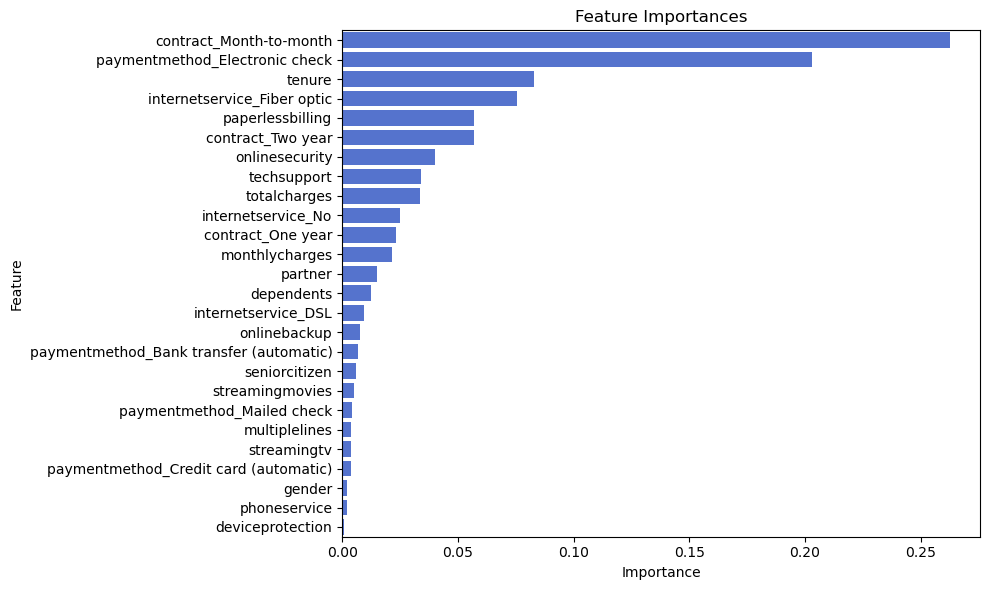

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Feature_Imp_df, x='Importance', y='Feature', color='royalblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## **5. XG Boost Model**

### 5.1. Train the model in Pipeline

In [71]:
xgb = XGBClassifier(random_state=3)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=3, ...)

In [72]:
xgb.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 3,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [143]:
#xgb = XGBClassifier(n_estimators=500, subsample=0.75 , colsample_bytree=0.5, random_state=3)
# lambda: L2 regularization term on weights. Higher values increase the regularization.
# alpha: L1 regularization term on weights. Higher values increase the regularization.
# subsample: percentage of rows used for each tree construction.
# colsample_bytree: percentage of columns used for each tree construction. 

xgb = XGBClassifier(n_estimators=100,
                    max_depth=3, 
                    subsample=0.5 , 
                    colsample_bynode=0.4, 
                    learning_rate=0.01,
                    random_state=3)

pipeline_xgb = Pipeline([("col_transformer", preprocessor_treebased),
                         ("smote", SMOTE(random_state=42)),  # Step 2: SMOTE for handling class imbalance
                         ("model", xgb)])
# train the model
pipeline_xgb.fit(X_train, y_train)
y_pred = pipeline_xgb.predict(X_test)

### 5.2. Confusion Matrix & Classification Report

----------------------------------------------------------------------

XGBoost Results:
----------------------------------------------------------------------
XGBoost F1_score(weighted): 0.78

XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       439
           1       0.55      0.75      0.63       159

    accuracy                           0.77       598
   macro avg       0.72      0.76      0.73       598
weighted avg       0.80      0.77      0.78       598

----------------------------------------------------------------------


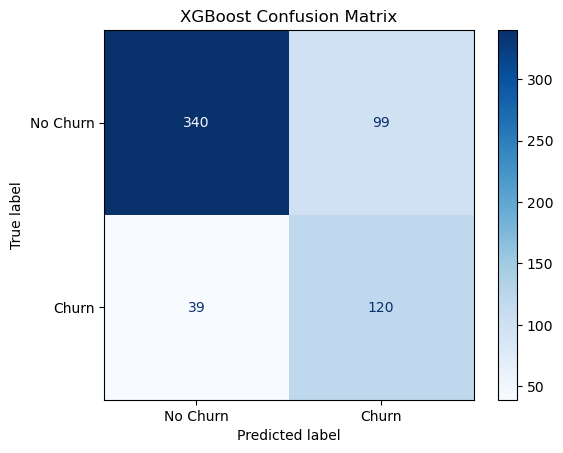

In [144]:
print("-"*70)
print("\nXGBoost Results:")
evaluate_model(pipeline_xgb, X_test, y_test, "XGBoost")

ROC AUC Score: 0.8369006174696638


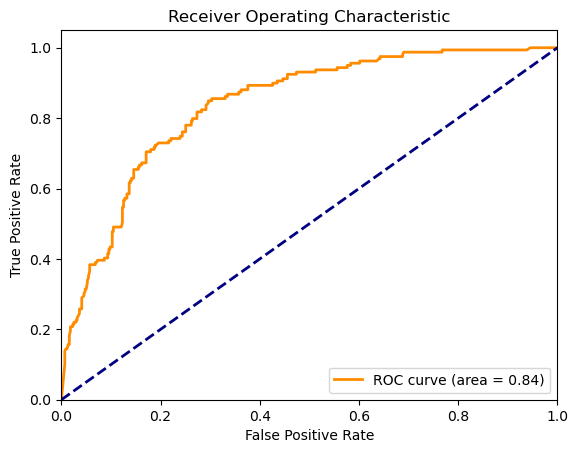

In [75]:
y_proba = pipeline_xgb.predict_proba(X_test)[:, 1]

# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 5.3. Feature Importance

In [76]:
xgb_model = pipeline_xgb['model']
xgb_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=0.3,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.001, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=3, ...)

In [77]:
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance.
feature_imp_value = xgb_model.feature_importances_
feature_imp_value

array([0.00487288, 0.07862995, 0.06183032, 0.15726987, 0.04988925,
       0.13400799, 0.02382415, 0.01728931, 0.07293256, 0.01613295,
       0.        , 0.        , 0.03557401, 0.00995662, 0.05828609,
       0.02333207, 0.03124113, 0.04604307, 0.01910556, 0.00946625,
       0.02520037, 0.00990929, 0.00806128, 0.05858013, 0.01804407,
       0.03052086], dtype=float32)

In [78]:
# Get the transformed feature names after applying preprocessing step in the pipeline
#ohe = pipeline_rfc.named_steps['col_transformer'].named_transformers_['onehot']
ohe = pipeline_xgb.named_steps['col_transformer']
ohe_feature_names = ohe.get_feature_names_out()
ohe_feature_names

array(['onehot__internetservice_DSL',
       'onehot__internetservice_Fiber optic',
       'onehot__internetservice_No', 'onehot__contract_Month-to-month',
       'onehot__contract_One year', 'onehot__contract_Two year',
       'onehot__paymentmethod_Bank transfer (automatic)',
       'onehot__paymentmethod_Credit card (automatic)',
       'onehot__paymentmethod_Electronic check',
       'onehot__paymentmethod_Mailed check', 'remainder__gender',
       'remainder__seniorcitizen', 'remainder__partner',
       'remainder__dependents', 'remainder__tenure',
       'remainder__phoneservice', 'remainder__multiplelines',
       'remainder__onlinesecurity', 'remainder__onlinebackup',
       'remainder__deviceprotection', 'remainder__techsupport',
       'remainder__streamingtv', 'remainder__streamingmovies',
       'remainder__paperlessbilling', 'remainder__monthlycharges',
       'remainder__totalcharges'], dtype=object)

In [79]:
# feature names from after preprocessing step in the pipeline 
feature_names = np.array(ohe_feature_names)

# Remove 'onehot__' and 'remainder__' prefixes
feature_names = [name.replace('onehot__', '').replace('remainder__', '') for name in feature_names]

Feature_Imp_df = pd.DataFrame({
    'Feature': feature_names,   
    'Importance': feature_imp_value    
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)   # sorting in descending order

Feature_Imp_df

,Feature,Importance
0,contract_Month-to-month,0.157270
1,contract_Two year,0.134008
2,internetservice_Fiber optic,0.078630
3,paymentmethod_Electronic check,0.072933
4,internetservice_No,0.061830
5,paperlessbilling,0.058580
6,tenure,0.058286
7,contract_One year,0.049889
8,onlinesecurity,0.046043
9,partner,0.035574


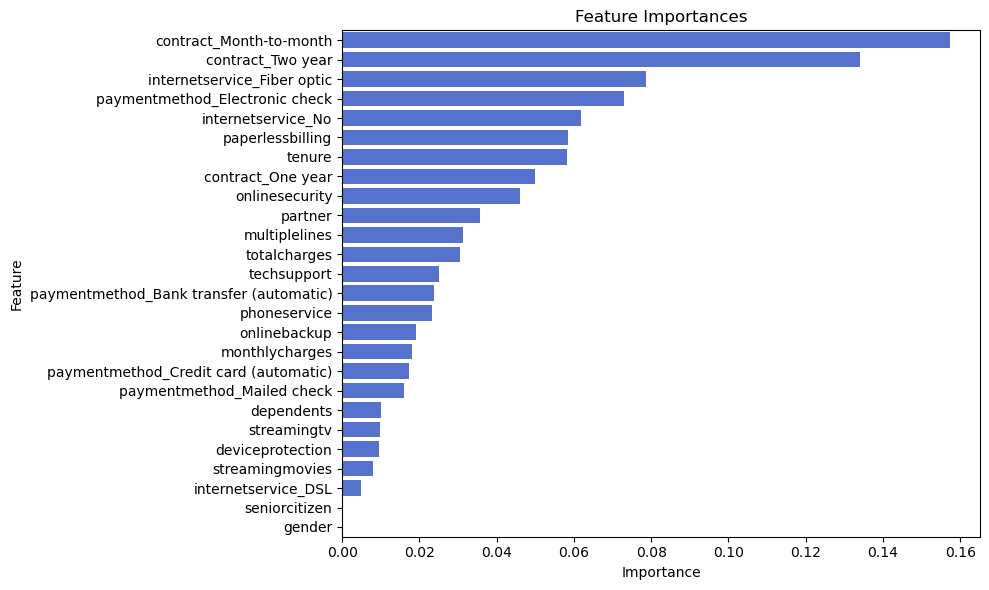

In [80]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Feature_Imp_df, x='Importance', y='Feature', color='royalblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## **6. Logistic Regression Model**

### 6.1. Train the model in Pipeline

In [81]:
lr = LogisticRegression(max_iter=1000, random_state=3)
#lr = LogisticRegression(class_weight={0:1,1:200},solver='sag', max_iter=5000,random_state=3)

In [82]:
from imblearn.pipeline import Pipeline  # Import from imblearn for SMOTE support

numerical_cols = ['tenure', 'monthlycharges', 'totalcharges']
categorical_cols = ['internetservice','contract','paymentmethod']

# Preprocessing pipeline
preprocessor_lr = ColumnTransformer([
        ('num', StandardScaler(), numerical_cols),
        ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_cols)  # Apply OneHotEncoder to other categorical cols
    ],
    remainder='passthrough'  # Keep other columns as-is
)

pipeline_lr = Pipeline([("col_transformer", preprocessor_lr),
                         ("smote", SMOTE(random_state=3)),  # Step 2: SMOTE for handling class imbalance
                         ("model", lr)])

In [83]:
pipeline_lr.fit(X_train,y_train)

Pipeline(steps=[('col_transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num', StandardScaler(),
                                                  ['tenure', 'monthlycharges',
                                                   'totalcharges']),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['internetservice',
                                                   'contract',
                                                   'paymentmethod'])])),
                ('smote', SMOTE(random_state=3)),
                ('model', LogisticRegression(max_iter=1000, random_state=3))])

In [84]:
y_pred = pipeline_lr.predict(X_test)

### 6.2. Confusion Matrix & Classification Report

----------------------------------------------------------------------
\Logistic Regression Results:
----------------------------------------------------------------------
Logistic Regression F1_score(weighted): 0.76

Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.75      0.82       439
           1       0.52      0.77      0.62       159

    accuracy                           0.75       598
   macro avg       0.71      0.76      0.72       598
weighted avg       0.80      0.75      0.76       598

----------------------------------------------------------------------


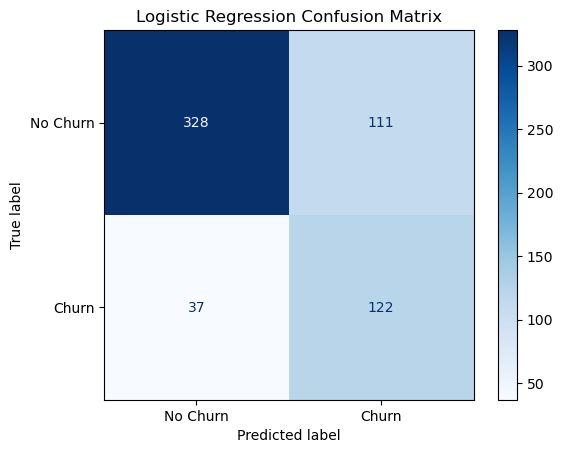

In [85]:
print("-"*70)
print("\Logistic Regression Results:")
evaluate_model(pipeline_lr, X_test, y_test, "Logistic Regression")

ROC AUC Score: 0.8340854715548488


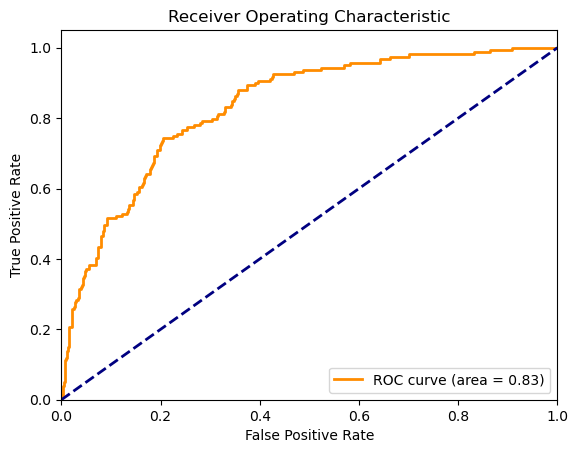

In [86]:
y_proba = pipeline_lr.predict_proba(X_test)[:, 1]

# Print ROC AUC Score
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# Plotting ROC AUC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_score(y_test, y_proba))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### 6.3. Feature Importance

In [87]:
lr_model = pipeline_lr['model']
lr_model

LogisticRegression(max_iter=1000, random_state=3)

In [88]:
# The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. 
# It is also known as the Gini importance.
feature_imp_value = lr_model.coef_
feature_imp_value

array([[-1.56101519e+00,  5.66858159e-02,  8.93601399e-01,
         4.71357062e-02,  6.84064130e-01, -7.27820344e-01,
         7.74042670e-01,  7.02147840e-02, -8.40877961e-01,
        -4.14382782e-02, -1.76826509e-01,  2.90433583e-01,
        -6.87893028e-02, -8.24829422e-02,  1.05993776e-03,
         1.53255466e-02, -1.05722489e-01, -6.50332306e-01,
         3.13808933e-01, -6.17932290e-01, -2.44018618e-01,
        -1.15886522e-01, -4.86974566e-01,  2.17371034e-01,
         2.36053958e-01,  4.31199909e-01]])

In [89]:
type(feature_imp_value)

numpy.ndarray

In [90]:
# Get the transformed feature names after applying preprocessing step in the pipeline
#ohe = pipeline_rfc.named_steps['col_transformer'].named_transformers_['onehot']
ohe = pipeline_lr.named_steps['col_transformer']
ohe_feature_names = ohe.get_feature_names_out()
ohe_feature_names

array(['num__tenure', 'num__monthlycharges', 'num__totalcharges',
       'onehot__internetservice_DSL',
       'onehot__internetservice_Fiber optic',
       'onehot__internetservice_No', 'onehot__contract_Month-to-month',
       'onehot__contract_One year', 'onehot__contract_Two year',
       'onehot__paymentmethod_Bank transfer (automatic)',
       'onehot__paymentmethod_Credit card (automatic)',
       'onehot__paymentmethod_Electronic check',
       'onehot__paymentmethod_Mailed check', 'remainder__gender',
       'remainder__seniorcitizen', 'remainder__partner',
       'remainder__dependents', 'remainder__phoneservice',
       'remainder__multiplelines', 'remainder__onlinesecurity',
       'remainder__onlinebackup', 'remainder__deviceprotection',
       'remainder__techsupport', 'remainder__streamingtv',
       'remainder__streamingmovies', 'remainder__paperlessbilling'],
      dtype=object)

In [91]:
# feature names from after preprocessing step in the pipeline 
feature_names = np.array(ohe_feature_names)

# Flatten feature_imp_value to ensure it's a 1D array
feature_imp_value = feature_imp_value.flatten()

# Remove 'onehot__' and 'remainder__' prefixes
feature_names = [name.replace('onehot__', '').replace('remainder__', '') for name in feature_names]

Feature_Imp_df = pd.DataFrame({
    'Feature': feature_names,   
    'Importance': feature_imp_value    
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)   # sorting in descending order

Feature_Imp_df

,Feature,Importance
0,num__totalcharges,0.893601
1,contract_Month-to-month,0.774043
2,internetservice_Fiber optic,0.684064
3,paperlessbilling,0.431200
4,multiplelines,0.313809
5,paymentmethod_Electronic check,0.290434
6,streamingmovies,0.236054
7,streamingtv,0.217371
8,contract_One year,0.070215
9,num__monthlycharges,0.056686


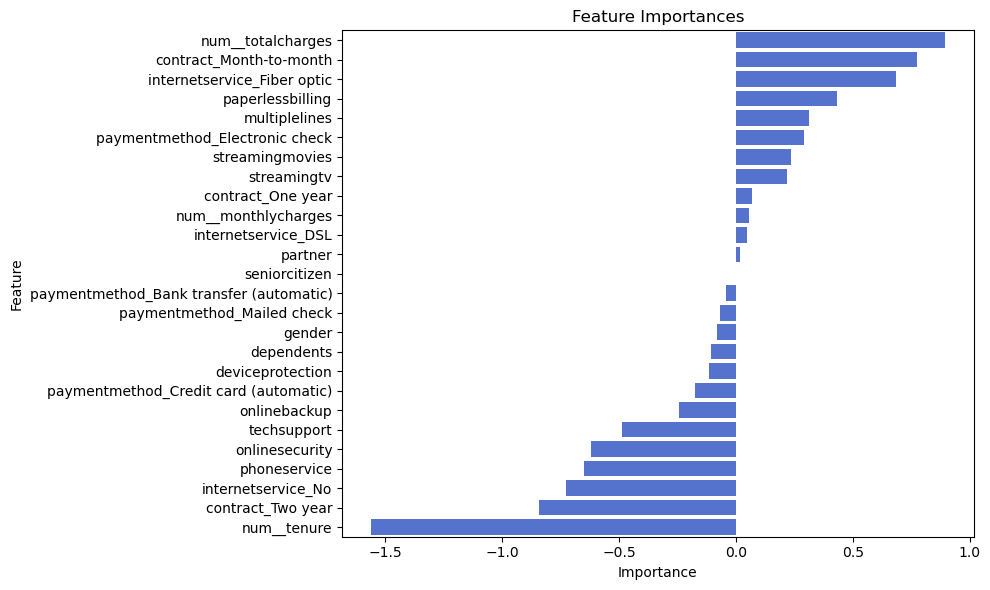

In [92]:
plt.figure(figsize=(10, 6))
sns.barplot(data=Feature_Imp_df, x='Importance', y='Feature', color='royalblue')
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

## **7. BalancedRandomForestClassifier model**

In [93]:
from imblearn.ensemble import BalancedRandomForestClassifier

balanced_rfc = BalancedRandomForestClassifier(n_estimators=100, 
                             criterion='gini', 
                             max_depth=10, 
                             max_features=0.30, 
                             max_samples=0.5, 
                             oob_score=True,
                             sampling_strategy="all",
                             bootstrap=True,replacement=True,                        
                             random_state=3)

from imblearn.pipeline import Pipeline  # Import from imblearn for SMOTE support

pipeline_balanced_rfc = Pipeline([("col_transformer", preprocessor_treebased),
                                  ("model", balanced_rfc)])

pipeline_balanced_rfc.fit(X_train,y_train)
y_pred = pipeline_balanced_rfc.predict(X_test)

### 7.2. Confusion Matrix & Classification Report

----------------------------------------------------------------------

BalancedRandomForestClassifier Results:
----------------------------------------------------------------------
BalancedRandomForestClassifier F1_score(weighted): 0.78

BalancedRandomForestClassifier Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.76      0.83       439
           1       0.54      0.77      0.64       159

    accuracy                           0.76       598
   macro avg       0.72      0.77      0.73       598
weighted avg       0.81      0.76      0.78       598

----------------------------------------------------------------------


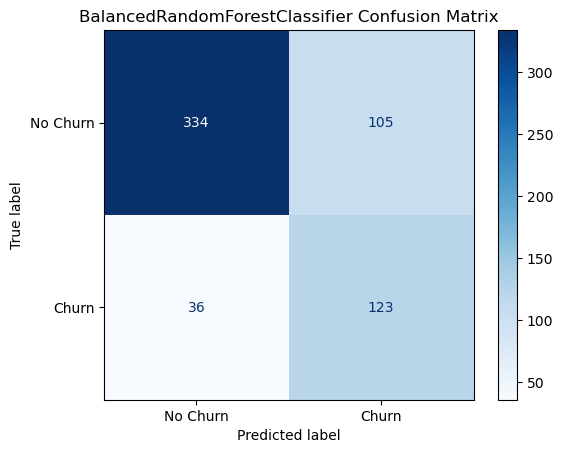

In [94]:
print("-"*70)
print("\nBalancedRandomForestClassifier Results:")
evaluate_model(pipeline_balanced_rfc, X_test, y_test, "BalancedRandomForestClassifier")

## **8. Save the Trained ML model**

In [95]:
# save the pipeline 
#pickle.dump(pipe_rf,open('pipeline_xgb.pkl','wb'))